# HW6-Assignment4
Author:xj655

# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [7]:
import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

In [8]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
#imports downloader
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
from getCitiBikeCSV import getCitiBikeCSV
DEVELOPING = False

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [27]:
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [9]:
datestring = '201501'
getCitiBikeCSV(datestring)
datestring_1 = '201508'
getCitiBikeCSV(datestring_1)

file in place, you can continue
file in place, you can continue


In [10]:
df01 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df01.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [11]:
df08 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring_1 + '-citibike-tripdata.csv')
df08.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [12]:
df = pd.concat([df01, df08])

In [13]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [68]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'starthour'],
      dtype='object')

In [69]:
print ("Shape of CB DF")
df.shape

Shape of CB DF


(1464596, 17)

In [70]:
df.describe()
#subsample!!! Not to slow the python speed

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,starthour
count,1.464596e+06,1.464596e+06,1.464596e+06,1.464596e+06,1.464596e+06,1.464596e+06,1.464596e+06,1.464596e+06,1.237967e+06,1.464596e+06,1.464596e+06
mean,9.466748e+02,5.040372e+02,4.073468e+01,-7.399064e+01,5.028141e+02,4.073440e+01,-7.399074e+01,1.958287e+04,1.976648e+03,1.041010e+00,1.405641e+01
std,7.029916e+03,5.133490e+02,1.942573e-02,1.321849e-02,5.130835e+02,1.945437e-02,1.324331e-02,2.826499e+03,1.142836e+01,5.922041e-01,4.915277e+00
min,6.000000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,4.067891e+01,-7.401713e+01,1.452900e+04,1.885000e+03,0.000000e+00,0.000000e+00
25%,3.940000e+02,3.070000e+02,4.072087e+01,-7.400017e+01,3.070000e+02,4.072066e+01,-7.400027e+01,1.711300e+04,1.969000e+03,1.000000e+00,1.000000e+01
50%,6.360000e+02,4.170000e+02,4.073649e+01,-7.399076e+01,4.150000e+02,4.073588e+01,-7.399076e+01,1.967000e+04,1.979000e+03,1.000000e+00,1.500000e+01
75%,1.068000e+03,4.950000e+02,4.075020e+01,-7.398192e+01,4.930000e+02,4.074972e+01,-7.398192e+01,2.225500e+04,1.986000e+03,1.000000e+00,1.800000e+01
max,2.842280e+06,3.224000e+03,4.077164e+01,-7.392989e+01,3.224000e+03,4.077706e+01,-7.392989e+01,2.435600e+04,1.999000e+03,2.000000e+00,2.300000e+01


# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the trip duration distribution of day and night riders**
$$ \alpha = 0.05 $$

extracting the hour of start( day/night) happens in the cell below

In [47]:
#chose day hours vs night hours:
DAYTIME = (6, 18)

In [75]:
df['starthour'] = pd.to_numeric(df.starttime.apply(lambda x: 
                                                           x.split()[1].split(':')[0]))
#定位 starttime 2nd line, the number before ":"
df['starthour']

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
           ..
1179014    23
1179015    23
1179016    23
1179017    23
1179018    23
1179019    23
1179020    23
1179021    23
1179022    23
1179023    23
1179024    23
1179025    23
1179026    23
1179027    23
1179028    23
1179029    23
1179030    23
1179031    23
1179032    23
1179033    23
1179034    23
1179035    23
1179036    23
1179037    23
1179038    23
1179039    23
1179040    23
1179041    23
1179042    23
1179043    23
Name: starthour, Length: 1464596, dtype: int64

In [76]:
#store the info of geo
geoborough = (df[['start station latitude', 
                'start station longitude']].values.astype(float))

In [80]:
#dropping some data I no longer need
df_tmp = df.drop(columns=[ 'starttime', 'stoptime',  'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender','date'],axis=1)

,tripduration,start station id,start station name,start station latitude,start station longitude,starthour
0,1346,455,1 Ave & E 44 St,40.750020,-73.969053,0
1,363,434,9 Ave & W 18 St,40.743174,-74.003664,0
2,346,491,E 24 St & Park Ave S,40.740964,-73.986022,0
3,182,384,Fulton St & Waverly Ave,40.683178,-73.965964,0
4,969,474,5 Ave & E 29 St,40.745168,-73.986831,0


In [84]:
df_tmp['dayride'] = (df_tmp.starthour.values > DAYTIME[0]) & (df_tmp.starthour.values < DAYTIME[1])
df_tmp.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,starthour,dayride
0,1346,455,1 Ave & E 44 St,40.750020,-73.969053,0,False
1,363,434,9 Ave & W 18 St,40.743174,-74.003664,0,False
2,346,491,E 24 St & Park Ave S,40.740964,-73.986022,0,False
3,182,384,Fulton St & Waverly Ave,40.683178,-73.965964,0,False
4,969,474,5 Ave & E 29 St,40.745168,-73.986831,0,False


In [83]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df_tmp.describe()

,tripduration,start station id,start station latitude,start station longitude,starthour
count,1.464596e+06,1.464596e+06,1.464596e+06,1.464596e+06,1.464596e+06
mean,9.466748e+02,5.040372e+02,4.073468e+01,-7.399064e+01,1.405641e+01
std,7.029916e+03,5.133490e+02,1.942573e-02,1.321849e-02,4.915277e+00
min,6.000000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,0.000000e+00
25%,3.940000e+02,3.070000e+02,4.072087e+01,-7.400017e+01,1.000000e+01
50%,6.360000e+02,4.170000e+02,4.073649e+01,-7.399076e+01,1.500000e+01
75%,1.068000e+03,4.950000e+02,4.075020e+01,-7.398192e+01,1.800000e+01
max,2.842280e+06,3.224000e+03,4.077164e+01,-7.392989e+01,2.300000e+01


In [89]:
print ("Number of daytime rides", df_tmp.dayride.sum())
print ("Number of nighttime rides", (~df_tmp.dayride).sum())

Number of daytime rides 967732
Number of nighttime rides 496864


# extra credit

#It is not (lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. )

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

/nfshome/xj655/.conda/envs/myEvri/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


TypeError: get_xmajorticklabels() takes 1 positional argument but 2 were given

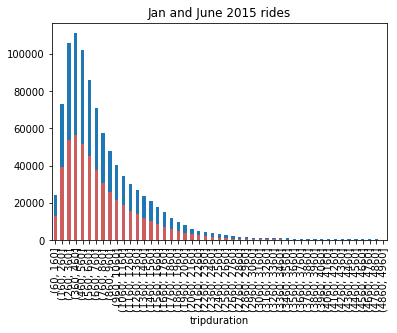

In [162]:

#bins = np.arange(60, 2842280, 100)

bins = np.arange(60,5000, 100)
triptobin = df_tmp[df_tmp.dayride].tripduration
tripday = df_tmp[df_tmp.dayride].tripduration.groupby(pd.cut(triptobin, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
tripday.set_title("Jan and June 2015 rides")
triptobin_night = df_tmp[df_tmp.dayride == False].tripduration
tripnight = df_tmp[~df_tmp.dayride].tripduration.groupby(pd.cut(triptobin_night, bins)).agg([count_nonzero]).plot(kind='bar', ax = tripday,colors = 'IndianRed',legend=False)

#tripday.set_xticklabels()....




**Figure 1: histogrammed distribution of riders' tripduration by daytime/night  **
The distribution's outline is similar, however the average seems lower in night than in daytime.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

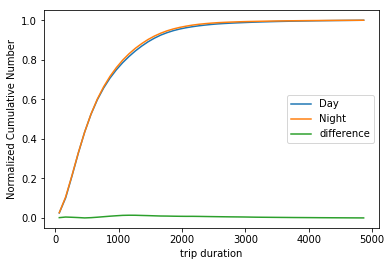

In [157]:
#print(df_tmp[df_tmp['dayride'] == True ].tripduration.cumsum())

csDay=df_tmp[df_tmp['dayride'] == True ].tripduration.groupby(pd.cut(triptobin, bins)).agg([count_nonzero]).cumsum()

csNight=df_tmp[df_tmp['dayride'] == False ].tripduration.groupby(pd.cut(triptobin_night, bins)).agg([count_nonzero]).cumsum()
#print(csNight)
#print(csDay / csDay.max())
#print (np.abs(csDay / csDay.max()-csNight / csNight.max()))
#print(np.sqrt(csDay / csDay.max() - csNight / csNight.max())**2)

pl.plot(bins[:-1] + 5, csDay / csDay.max(), label = "Day")
pl.plot(bins[:-1] + 5, csNight / csNight.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csNight / csNight.max() - csDay / csDay.max())**2, '-',label = "difference")
pl.xlabel("trip duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' tripduration by daytime/night** The difference is very low and keep the same. 

lets run the scipy KS test

In [158]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [164]:
ks = scipy.stats.ks_2samp(df_tmp[df_tmp.dayride].tripduration, df_tmp[~df_tmp.dayride].tripduration)
print (ks)

Ks_2sampResult(statistic=0.017437380568663396, pvalue=3.61545659240296e-87)


**  FILL IN THE CELL BELOW!**

## your words here
** this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS**
** to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function**

It's a two-tailed test. The P-value 3.62e-87 is far less than 5%, means the null hypothesis can be rejected that the two sample come from the same population distribution( have same mean).




The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

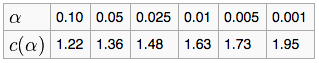

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

## your words here!...
#\ this cell is for you to redo the test with reducted dataset 
The null hypothesis is that the two samples are generated from the same distribution.
The alternative hypothesis is that the two samples are generated by unrelated distributions.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [177]:
len(df_tmp[df_tmp.dayride])
len(df_tmp[~df_tmp.dayride])

496864

In [178]:
a = np.random.choice(range(len(df_tmp[df_tmp.dayride])),size = int(967732/200))
b = np.random.choice(range(len(df_tmp[~df_tmp.dayride])),size = int(967732/200))

In [180]:
pearsontest = scipy.stats.pearsonr(np.sort(a),np.sort(b))
pearsontest


(0.9998394372816349, 0.0)

Null Hypothesis is rejected: The two sample are not correlated to each other.(p-value=0.00<0.05)

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

In [183]:
scipy.stats.spearmanr(np.sort(a),np.sort(b))

SpearmanrResult(correlation=0.9999999987548503, pvalue=0.0)

Null Hypothesis is rejected: The two sample are not correlated to each other.(p-value=0.00<0.05)

# Extra Credit

## BK vs MN

age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)

are different. Use 3 tests: KS, Pearson's, Spearman's. 

In [2]:
# Get data from NYC open data 
from shapely.geometry import Point
import geopandas as gpd

In [185]:
!curl https://data.cityofnewyork.us/api/views/7t3b-ywvw/rows.csv?accessType=DOWNLOAD > nycgeo.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2815k    0 2815k    0     0  3078k      0 --:--:-- --:--:-- --:--:-- 3077k


In [190]:
import pandas as pd
import os

os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")


In [191]:
!mv  /nfshome/xj655/PUI2018/nycgeo.csv $PUIDATA

In [14]:
nycg = pd.read_csv("%s/nycgeo.csv"%os.getenv("PUIDATA"))
nycg.head()

,BoroCode,BoroName,the_geom,Shape_Leng,Shape_Area
0,1,Manhattan,MULTIPOLYGON (((-74.01092841268031 40.68449147...,361649.881587,6.366006e+08
1,2,Bronx,MULTIPOLYGON (((-73.89680883223774 40.79580844...,463464.521828,1.186615e+09
2,5,Staten Island,MULTIPOLYGON (((-74.05050806403247 40.56642203...,330432.867999,1.623921e+09
3,3,Brooklyn,MULTIPOLYGON (((-73.86706149472118 40.58208797...,739945.437431,1.937567e+09
4,4,Queens,MULTIPOLYGON (((-73.83668274106707 40.59494669...,895228.960360,3.044772e+09


In [195]:
nycg.the_geom.describe()

count                                                     5
unique                                                    5
top       MULTIPOLYGON (((-73.86706149472118 40.58208797...
freq                                                      1
Name: the_geom, dtype: object

In [205]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'starthour'],
      dtype='object')

In [32]:
df["age2"] = 2018 - df["birth year"]
df_new = df.dropna()
df_new.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age,age2
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,58.0,58.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,55.0,55.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,44.0,44.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,49.0,49.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,41.0,41.0


In [33]:
df_new['age'] = df_new.age2.astype(int64)
df_new.head()

/nfshome/xj655/.conda/envs/myEvri/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age,age2
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,58,58.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,55,55.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,44,44.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,49,49.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,41,41.0


In [34]:
df_new.drop(columns=['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
    'gender', 'date','age2'],axis = 1, inplace=True)

/nfshome/xj655/.conda/envs/myEvri/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
df_new.head()

,start station latitude,start station longitude,birth year,age
0,40.750020,-73.969053,1960.0,58
1,40.743174,-74.003664,1963.0,55
2,40.740964,-73.986022,1974.0,44
3,40.683178,-73.965964,1969.0,49
4,40.745168,-73.986831,1977.0,41


In [37]:
 def makepoint(x,y):
    return Point(x,y)
for i in len(df_new['start station latitude']):    
    df_new['geoinfo'][i] =makepoint(df_new['start station latitude'][i],df_new["start station latitude"][i])

TypeError: 'int' object is not iterable